In [9]:
import csv
import re

input_file = 'stocks.txt'
output_file = 'stocks.csv'

pattern = re.compile(r"(\d+)\s+([\w\.]+)\s+([\w\s\.\,\(\)-]+)\s+([\d\.,]+[BMT])\s+([\d\.,]+)\s+([-+\.\d%]+)\s+([\d\.,BM]+)")

def convert_to_number(value):
    if value.endswith('T'):
        return float(value.replace(',', '').replace('T', '')) * 1_000_000_000_000
    elif value.endswith('B'):
        return float(value.replace(',', '').replace('B', '')) * 1_000_000_000
    elif value.endswith('M'):
        return float(value.replace(',', '').replace('M', '')) * 1_000_000
    return float(value.replace(',', ''))

data = []

with open(input_file, 'r') as file:
    for line in file:
        match = pattern.match(line)
        if match:
            rank, ticker, name, market_cap, price, change, volume = match.groups()
            market_cap = convert_to_number(market_cap)
            price = convert_to_number(price)
            volume = convert_to_number(volume)
            data.append([ticker, name, market_cap, price, change, volume])

data.sort(key=lambda x: x[2], reverse=True)

with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Ticker", "Name", "Market Cap", "Price", "Change", "Volume"])
    writer.writerows(data)

print(f"Data has been written to {output_file}.")


Data has been written to stocks.csv.


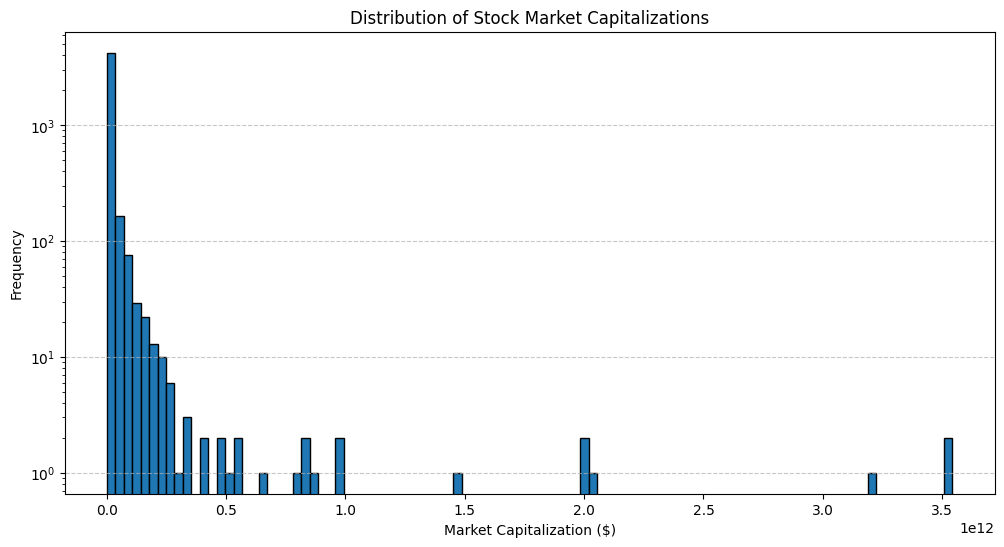

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from CSV
df = pd.read_csv('stocks.csv')

num_bins = 100

# Create the histogram plot with a specified number of bins
plt.figure(figsize=(12, 6))
plt.hist(df['Market Cap'], bins=num_bins, edgecolor='black')
plt.xlabel("Market Capitalization ($)")
plt.yscale('log')
plt.ylabel("Frequency")
plt.title("Distribution of Stock Market Capitalizations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df

,Ticker,Name,Market Cap,Price,Change,Volume
0,AAPL,Apple Inc.,3.542640e+12,233.01,1.06%,3.856000e+11
1,NVDA,NVIDIA Corporation,3.519420e+12,143.47,2.18%,9.631000e+10
2,MSFT,Microsoft Corporation,3.207220e+12,431.40,1.57%,2.451200e+11
3,GOOGL,Alphabet Inc.,2.030530e+12,164.95,1.37%,3.282800e+11
4,GOOG,Alphabet Inc.,2.013190e+12,166.75,1.35%,3.282800e+11
...,...,...,...,...,...,...
4559,LGHL,Lion Group Holding Ltd.,1.320000e+06,0.19,-2.95%,1.868000e+07
4560,NCPL,Netcapital Inc.,1.290000e+06,1.66,4.35%,3.570000e+06
4561,EAST,"Eastside Distilling, Inc.",1.110000e+06,0.60,-2.83%,1.035000e+07
4562,BSFC,Blue Star Foods Corp.,1.110000e+06,0.44,-14.13%,6.610000e+06


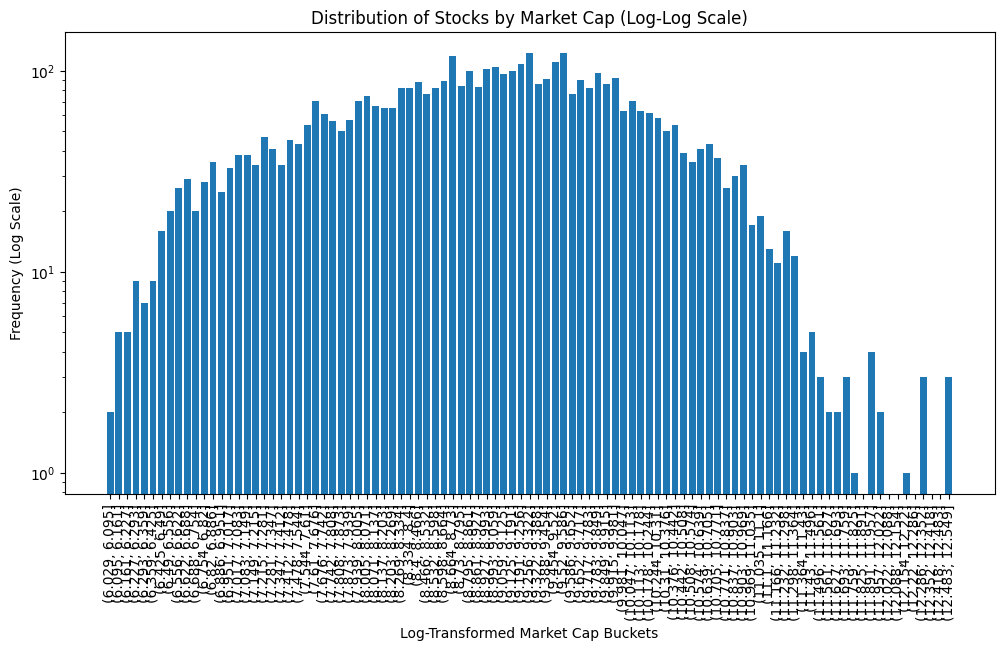

In [30]:
import numpy as np

# Log transform the market cap values
df['Log Market Cap'] = np.log10(df['Market Cap'])

# Creating 100 linearly spaced buckets for the log-transformed market cap values
buckets = np.linspace(df['Log Market Cap'].min(), df['Log Market Cap'].max(), 100)
df['Market Cap Bucket'] = pd.cut(df['Log Market Cap'], bins=buckets)

# Count the frequencies for each bucket
bucket_counts = df['Market Cap Bucket'].value_counts().sort_index()

# Plot the distribution with logarithmic frequency
plt.figure(figsize=(12, 6))
plt.bar(bucket_counts.index.astype(str), bucket_counts.values, log=True)
plt.xlabel('Log-Transformed Market Cap Buckets')
plt.ylabel('Frequency (Log Scale)')
plt.title('Distribution of Stocks by Market Cap (Log-Log Scale)')
plt.xticks(rotation=90)
plt.show()

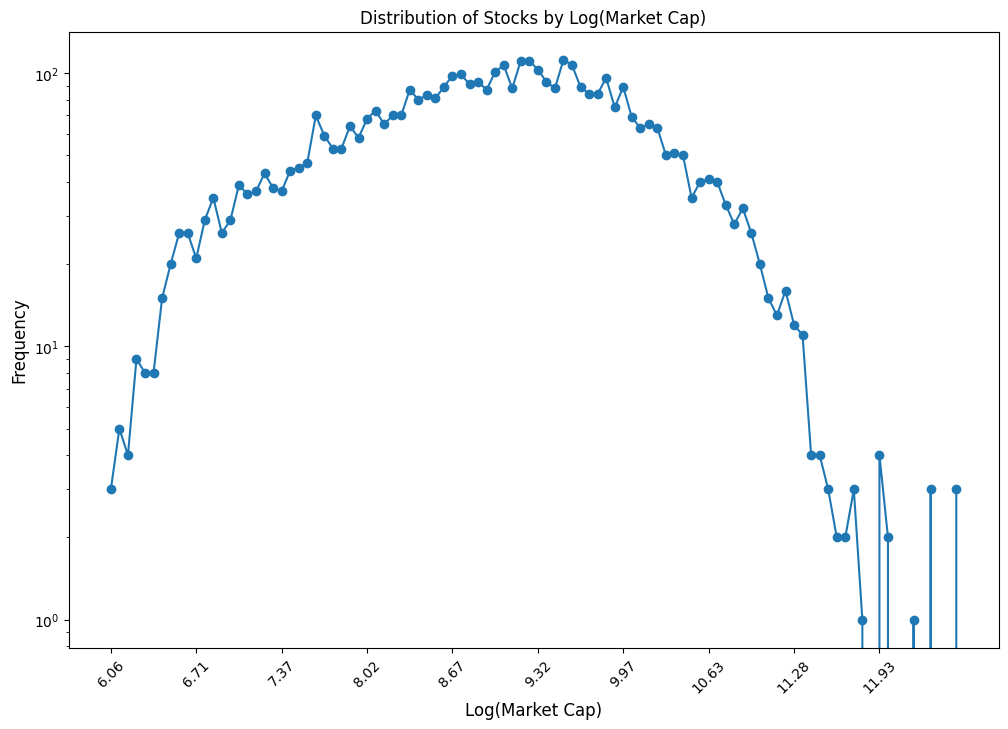

In [25]:
bin_counts, bin_edges = np.histogram(df['Log Market Cap'], bins=100)

# Calculate bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot with log-log scale
plt.figure(figsize=(12, 8))
plt.plot(bin_centers, bin_counts, marker='o')
plt.yscale('log')
plt.xlabel("Log(Market Cap)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Stocks by Log(Market Cap)")

# Set x-axis labels to display fewer labels for readability
plt.xticks(ticks=bin_centers[::10], labels=[f"{x:.2f}" for x in bin_centers[::10]], rotation=45)

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 2 with shape (99,).

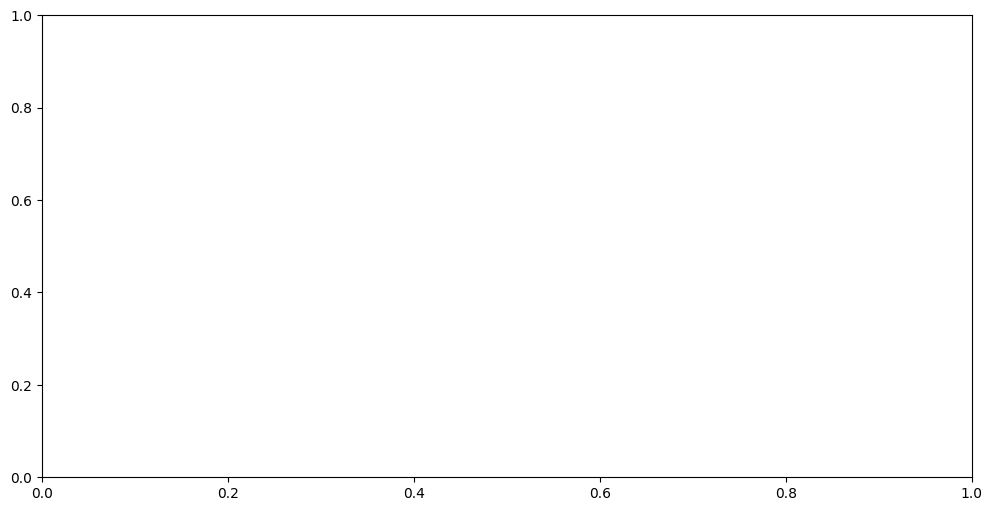

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Log-transform the market cap values
df['Log Market Cap'] = np.log10(df['Market Cap'])

# Create the distribution plot with 100 linearly spaced buckets
bucket_counts, bins = np.histogram(df['Log Market Cap'], bins=100)
bin_centers = 10 ** ((bins[:-1] + bins[1:]) / 2)  # Converting bins back to original scale for readable ticks

plt.figure(figsize=(12, 6))
plt.bar(bin_centers, bucket_counts, width=(bin_centers[1:] - bin_centers[:-1]), align='center')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Market Cap (log scale)')
plt.ylabel('Frequency (log scale)')

# Customizing x-ticks for readability
ticks = np.geomspace(bin_centers.min(), bin_centers.max(), num=10)  # Select ~10 ticks on a logarithmic scale
plt.xticks(ticks, labels=[f'{int(x):,}' for x in ticks], rotation=45)

plt.title('Distribution of Stock Market Caps')
plt.show()
